In [1]:
# importing Image class from PIL package
import glob
import scipy
import skimage
import matplotlib.pyplot as plt
from scipy import fft
from skimage import data, color
import numpy as np        
import skimage
import os
import cv2
from skimage import io
# from natsort import natsorted
from tqdm import tqdm
import numpy as np
from scipy import ndimage
from PIL import Image, ImageOps
import time
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb


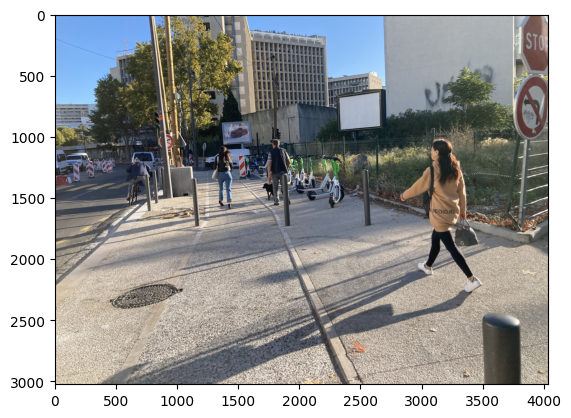

In [2]:
#im = Image.open(r"/Users/mariemdiane/Documents/image_fall.png")
im = Image.open(r"/Users/laurentperrinet/quantic/2022_archives/2022_RTC/IMG_6282.JPG") # une image au pif
plt.imshow(im)

In [3]:
# import PIL.Image


# rgba_image = PIL.Image.open(r"/Users/mariemdiane/Desktop/fall.png")
# rgb_image = rgba_image.convert('RGB')
rgb_image = np.array(im).copy()

In [4]:
rgb_image.shape

(3024, 4032, 3)

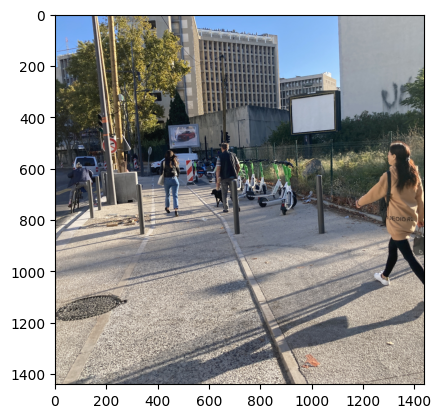

In [5]:
# img = im.resize((1440,1440))
# Laurent: il vaut mieux faire un crop, le resize va introduire un écrasement 
size = 1440
shift_X, shift_Y = 10, 242
img = rgb_image[::2, ::2, :] # downscaling brutal
img = img[shift_X:(shift_X+size), shift_Y:(shift_Y+size), :] # crop

plt.imshow(img)

In [6]:
hsv_img = rgb2hsv(img)
hue_img = hsv_img[:, :, 0].copy()
sat_img = hsv_img[:, :, 1].copy()
value_img = hsv_img[:, :, 2].copy()

In [7]:
value_img

array([[0.93333333, 0.93333333, 0.93333333, ..., 0.70980392, 0.70980392,
        0.71372549],
       [0.9372549 , 0.9372549 , 0.93333333, ..., 0.70980392, 0.70588235,
        0.70980392],
       [0.9372549 , 0.9372549 , 0.9372549 , ..., 0.70588235, 0.70588235,
        0.70980392],
       ...,
       [0.77647059, 0.6745098 , 0.65098039, ..., 0.74901961, 0.74117647,
        0.75686275],
       [0.81176471, 0.68235294, 0.6627451 , ..., 0.77647059, 0.84705882,
        0.84313725],
       [0.8       , 0.65882353, 0.78039216, ..., 0.41568627, 0.61960784,
        0.62352941]])

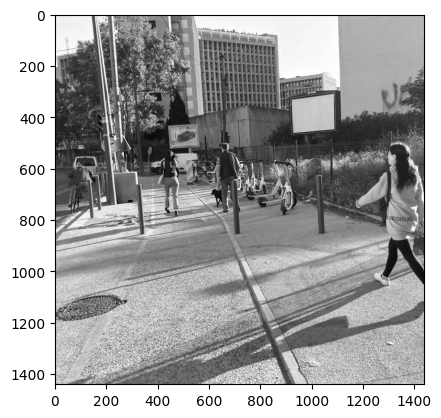

In [8]:
plt.imshow(value_img, cmap='gray')

In [9]:
value_img.min(), value_img.max()

(0.0, 1.0)

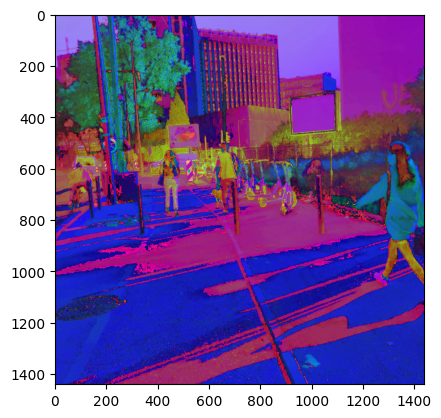

In [10]:
plt.imshow(hsv_img)

In [11]:
# On fait la texture fft sur value_image? # Dois faire l'opération sur la phase de value_img
def phase_shift(img, seed=1973):
    img_ = img.copy()
    img_ = (img_-.5)*2
    F2D = fft.rfft2(img_, s=None, norm=None)
    np.random.seed(seed=seed)
    phase = 2 * np.pi * np.random.rand(F2D.shape[0], F2D.shape[1])
    F_random = np.exp(1j * phase)
    Fz_scrambled = F_random * F2D
    img_scrambled = fft.irfft2(Fz_scrambled)
    img_scrambled = (img_scrambled - img_scrambled.min())/(img_scrambled.max()-img_scrambled.min())
    return img_scrambled

value_img_scrambled = phase_shift(value_img, seed=1234)

In [12]:
value_img_scrambled.shape


(1440, 1440)

In [13]:
hsv_img[:, :, 2] = value_img_scrambled

In [14]:
test_image = hsv2rgb(hsv_img)

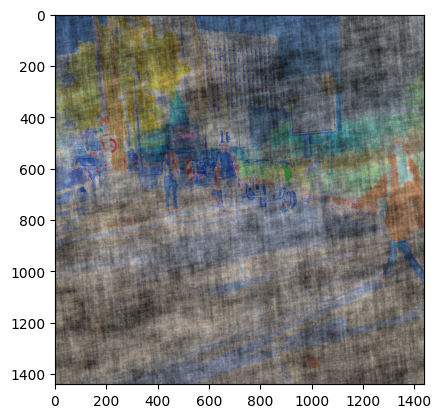

In [15]:
plt.imshow(test_image)

In [16]:

hue_img.min(), hue_img.max()

(0.0, 0.9983974358974359)

In [17]:
hue_img_scrambled = phase_shift(hue_img, seed=12345)
hsv_img[:, :, 0] = hue_img_scrambled

In [18]:
test_image = hsv2rgb(hsv_img)

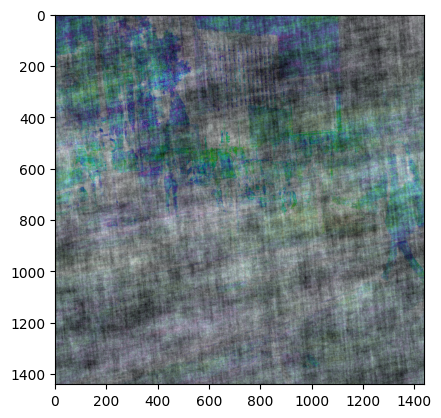

In [19]:
plt.imshow(test_image)

In [20]:
hue_img_scrambled = phase_shift(hue_img, seed=12345)
sat_img_scrambled = phase_shift(sat_img, seed=123456)
hsv_img[:, :, 0] = hue_img_scrambled
hsv_img[:, :, 1] = sat_img_scrambled
hsv_img[:, :, 2] = value_img_scrambled

In [21]:
test_image = hsv2rgb(hsv_img)

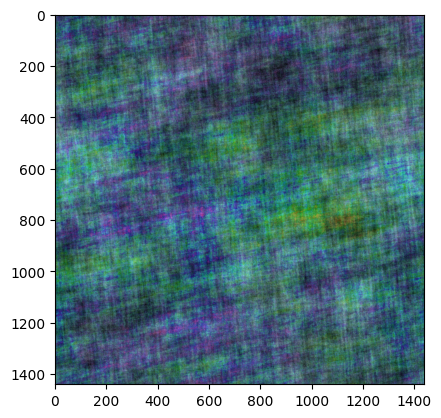

In [22]:
plt.imshow(test_image)

In [23]:
sat_img_scrambled = phase_shift(sat_img, seed=123456)
hsv_img[:, :, 0] = hue_img
hsv_img[:, :, 1] = sat_img_scrambled
hsv_img[:, :, 2] = value_img_scrambled

In [24]:
test_image = hsv2rgb(hsv_img)

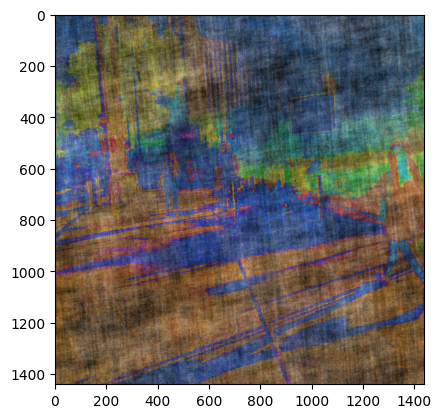

In [25]:
plt.imshow(test_image)

In [26]:
hue_img_scrambled = phase_shift(hue_img, seed=12345)
sat_img_scrambled = phase_shift(sat_img, seed=12345)
hsv_img[:, :, 0] = hue_img_scrambled
hsv_img[:, :, 1] = sat_img_scrambled
hsv_img[:, :, 2] = value_img_scrambled

In [27]:
test_image = hsv2rgb(hsv_img)

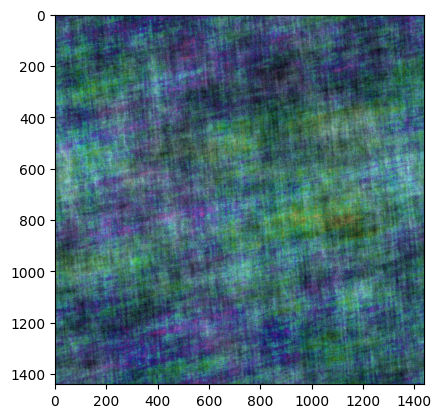

In [28]:
plt.imshow(test_image)